# EDA

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
# import a dataset
diamonds_data = sm.datasets.get_rdataset("diamonds", "ggplot2")
diamonds = diamonds_data.data

In [3]:
print(diamonds_data.__doc__)

.. container::

   .. container::

      ======== ===============
      diamonds R Documentation
      ======== ===============

      .. rubric:: Prices of over 50,000 round cut diamonds
         :name: prices-of-over-50000-round-cut-diamonds

      .. rubric:: Description
         :name: description

      A dataset containing the prices and other attributes of almost
      54,000 diamonds. The variables are as follows:

      .. rubric:: Usage
         :name: usage

      ::

         diamonds

      .. rubric:: Format
         :name: format

      A data frame with 53940 rows and 10 variables:

      price
         price in US dollars ($326–$18,823)

      carat
         weight of the diamond (0.2–5.01)

      cut
         quality of the cut (Fair, Good, Very Good, Premium, Ideal)

      color
         diamond colour, from D (best) to J (worst)

      clarity
         a measurement of how clear the diamond is (I1 (worst), SI2,
         SI1, VS2, VS1, VVS2, VVS1, IF (best))

      x

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
...,...,...,...,...,...,...,...,...,...,...
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.20,55.00,2757,5.83,5.87,3.64


In [8]:
# cut, color, clarity 모두 Categorical type으로 변형
diamonds["cut"] = pd.Categorical(
    diamonds["cut"], 
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ordered=True
)
diamonds["color"] = pd.Categorical(
    diamonds["color"], 
    categories=["D", "E", "F", "G", "H", "I", "J"],
    ordered=True
)
diamonds["clarity"] = pd.Categorical(
    diamonds["clarity"], 
    categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
    ordered=True
)

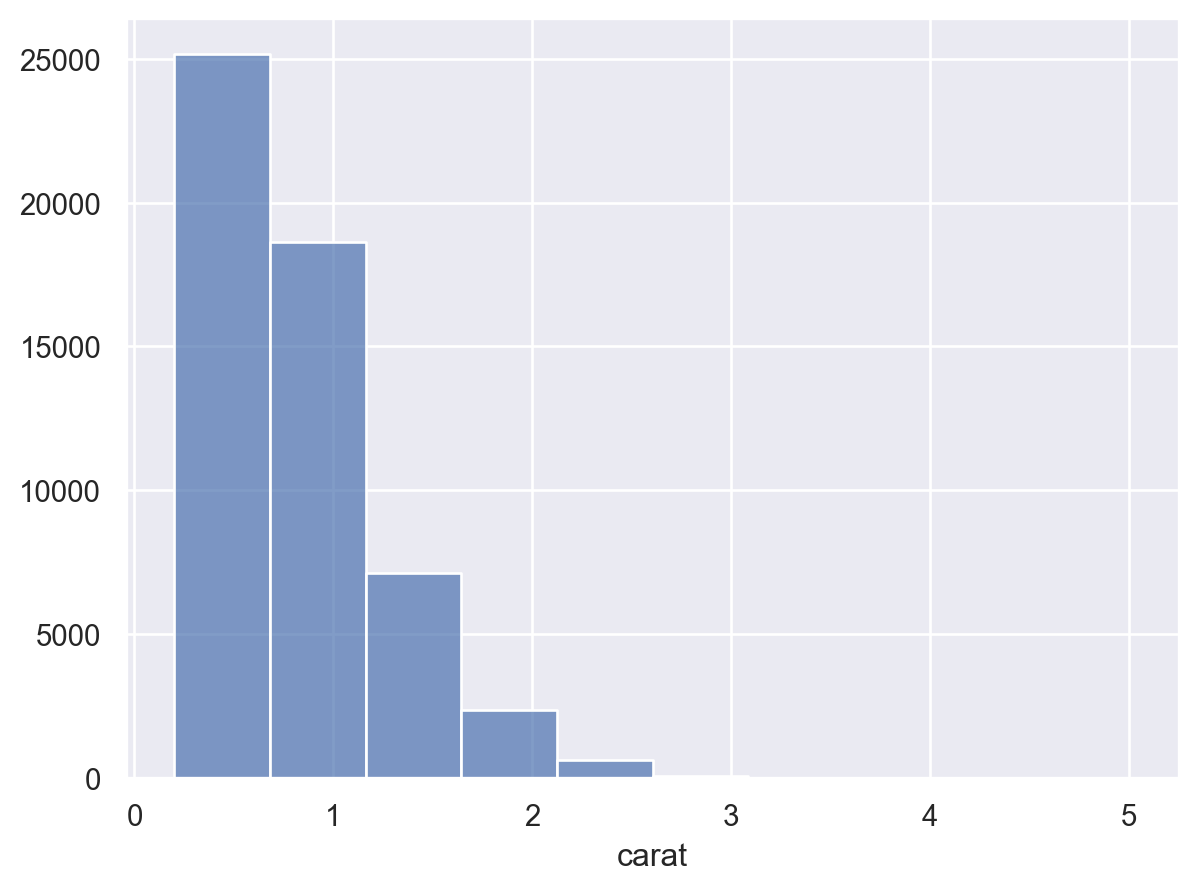

In [9]:
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.5)) # binwidth 0.5면 carat 0.5 단위로 --> 0.1로 하면 더 크게 변동성이 있다.
)

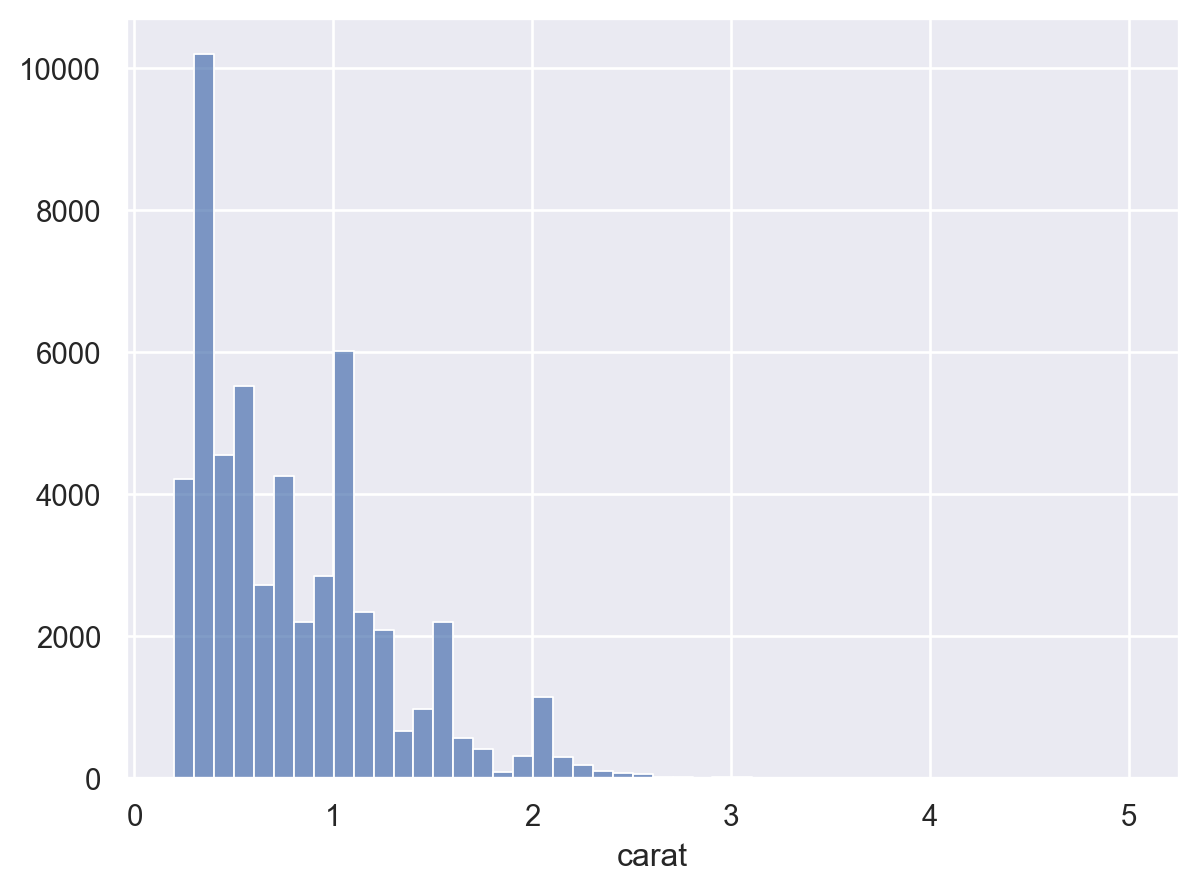

In [10]:
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.1)) # binwidth를 0.1로 하면 더 크게 변동성이 있다.
)

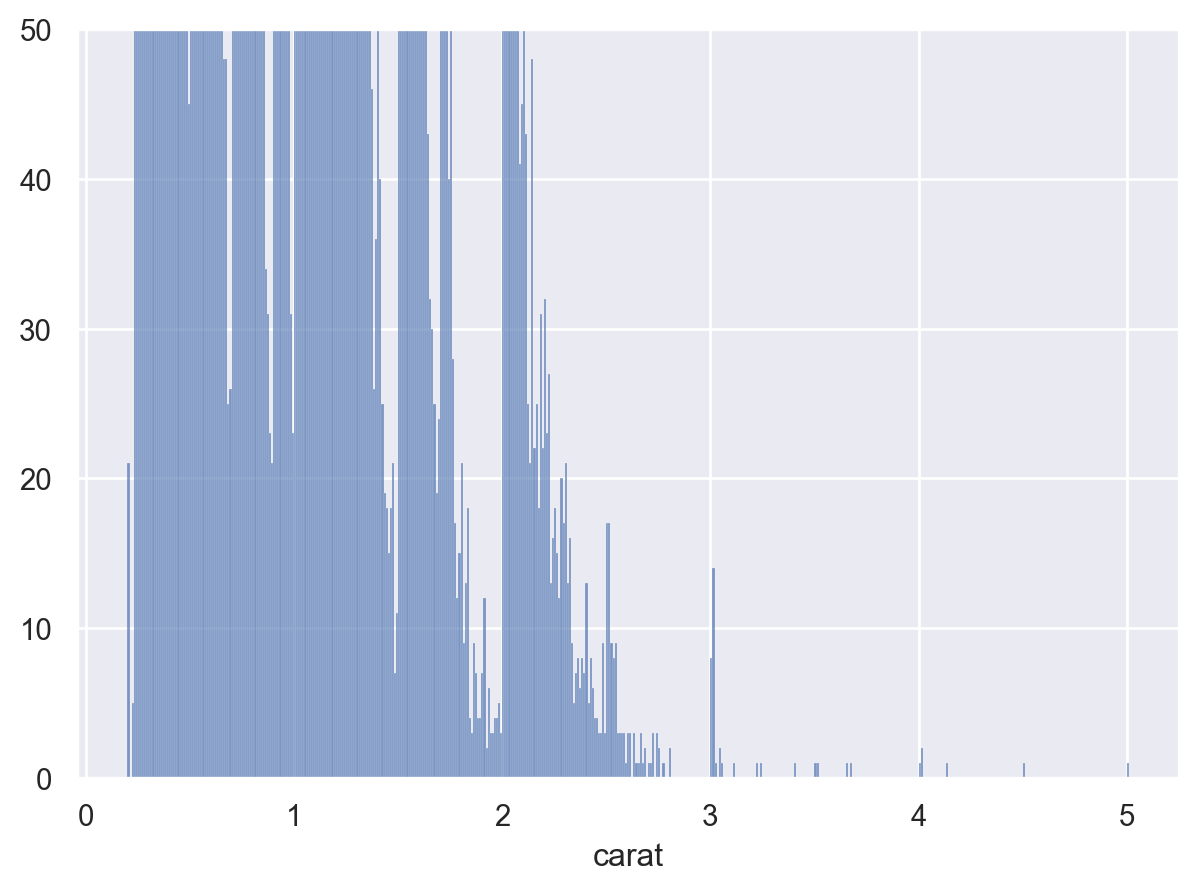

In [11]:
# Zoom-in
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.01))
    .limit(y=(0, 50)) # y로 확대를 하고 싶을 때
)

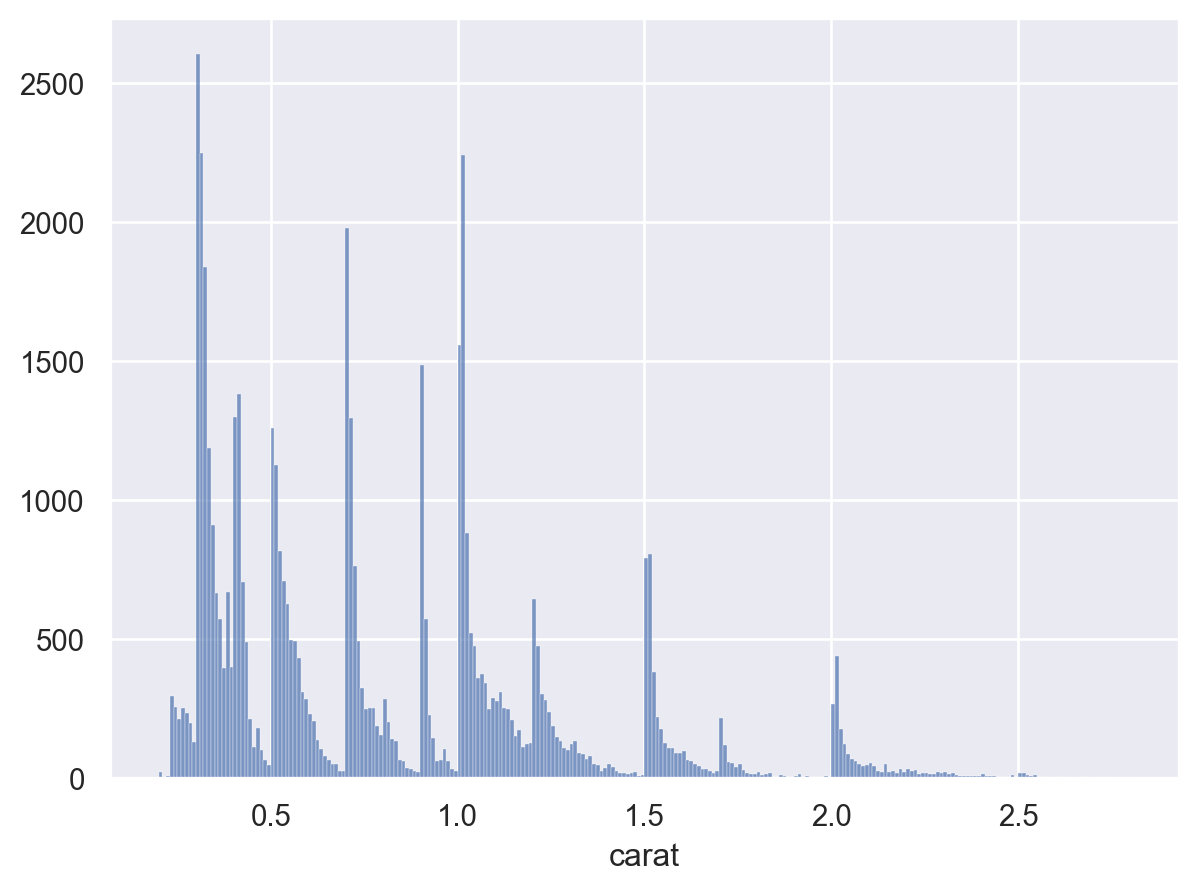

In [12]:
(
    so.Plot(diamonds.query('carat < 3'), x="carat")
    .add(so.Bars(), so.Hist(binwidth=.01))
)
# query 메서드 안에 condition을 적어주면 됨

In [13]:
pd.options.display.max_rows = 0
diamonds.value_counts("carat").head(15)

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
Name: count, dtype: int64

## 왜 0.3 캐럿이 많을까?
## 왜 0.99 캐럿이 없을까 --> 사람 심리, 그거 살 바에는 돈 더 보태서 1 캐럿을 사지 않을까?
## 3 캐럿 이상 없는 이유 --> 살 사람 자체가 많지 않으니까

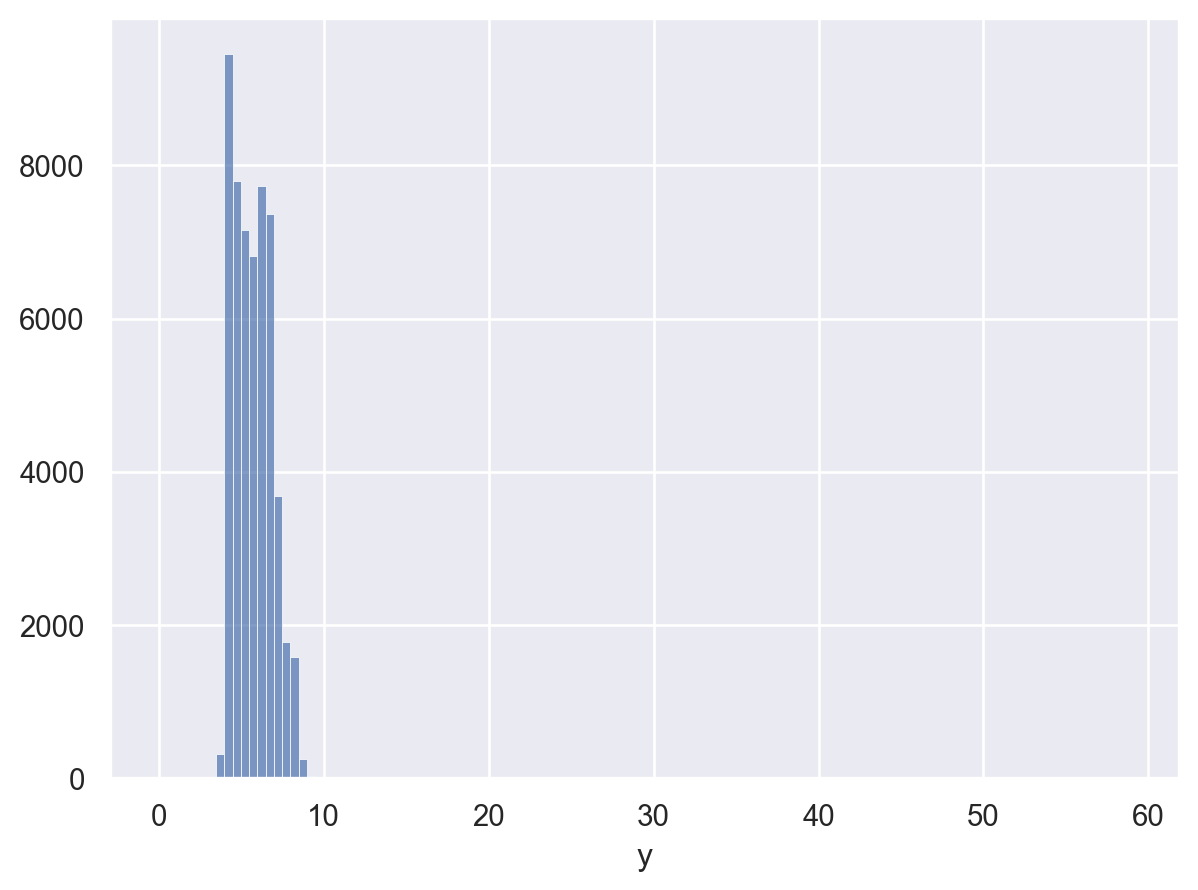

In [14]:
left = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5))
right = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5)).limit(y=(0, 30))

left

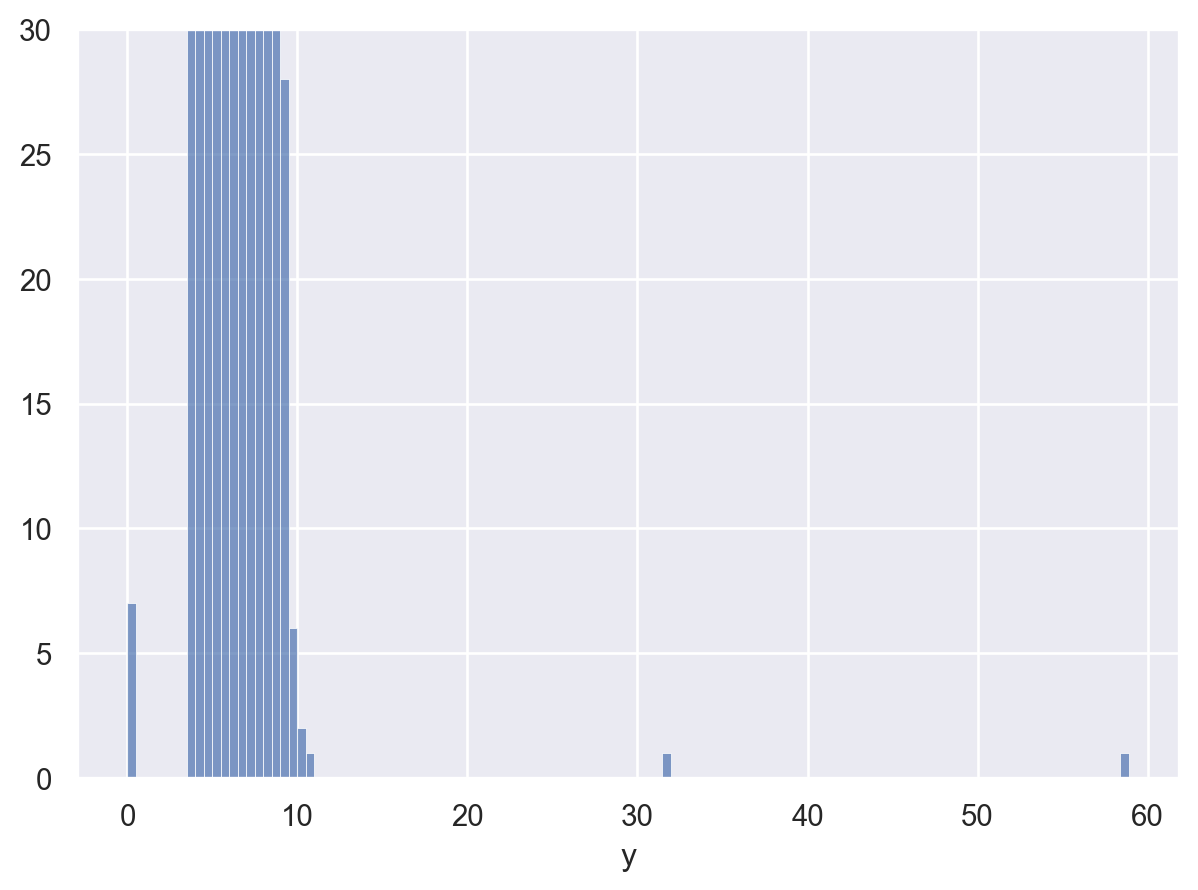

In [15]:
right

# y = 0, y > 20인 경우 이상치

In [16]:
pd.options.display.max_rows = 0
unusual = (
    diamonds[["price", "x", "y", "z"]]
    .query('y < 3 | y > 20')
    .sort_values("y")
)
unusual

,price,x,y,z
11963,5139,0.00,0.00,0.00
15951,6381,0.00,0.00,0.00
24520,12800,0.00,0.00,0.00
26243,15686,0.00,0.00,0.00
27429,18034,0.00,0.00,0.00
49556,2130,0.00,0.00,0.00
49557,2130,0.00,0.00,0.00
49189,2075,5.15,31.80,5.12
24067,12210,8.09,58.90,8.06


In [17]:
diamonds2 = diamonds.assign(
    y = lambda x: np.where((x.y < 3) | (x.y > 20), np.nan, x.y)
)

# 3보다 작거나 20보다 큰 것을 nan 값으로 대체

In [18]:
# 조건에 맞는 값들을 NA로 바꿈
diamonds["y"] = diamonds["y"].mask((diamonds["y"] < 3) | (diamonds["y"] > 20))

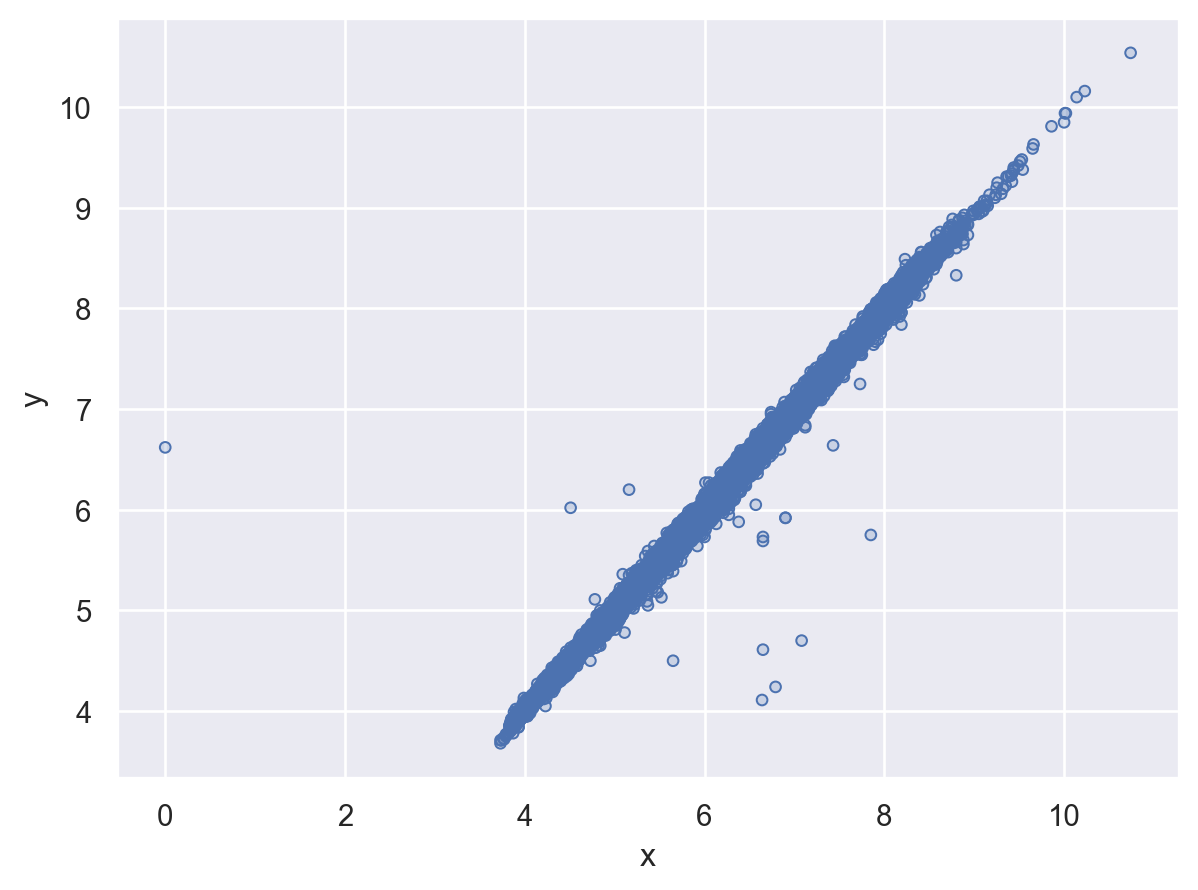

In [19]:
# NA의 제거에 대해 경고 없음!
(
    so.Plot(diamonds2, x="x", y="y")
    .add(so.Dots(alpha=1))
)

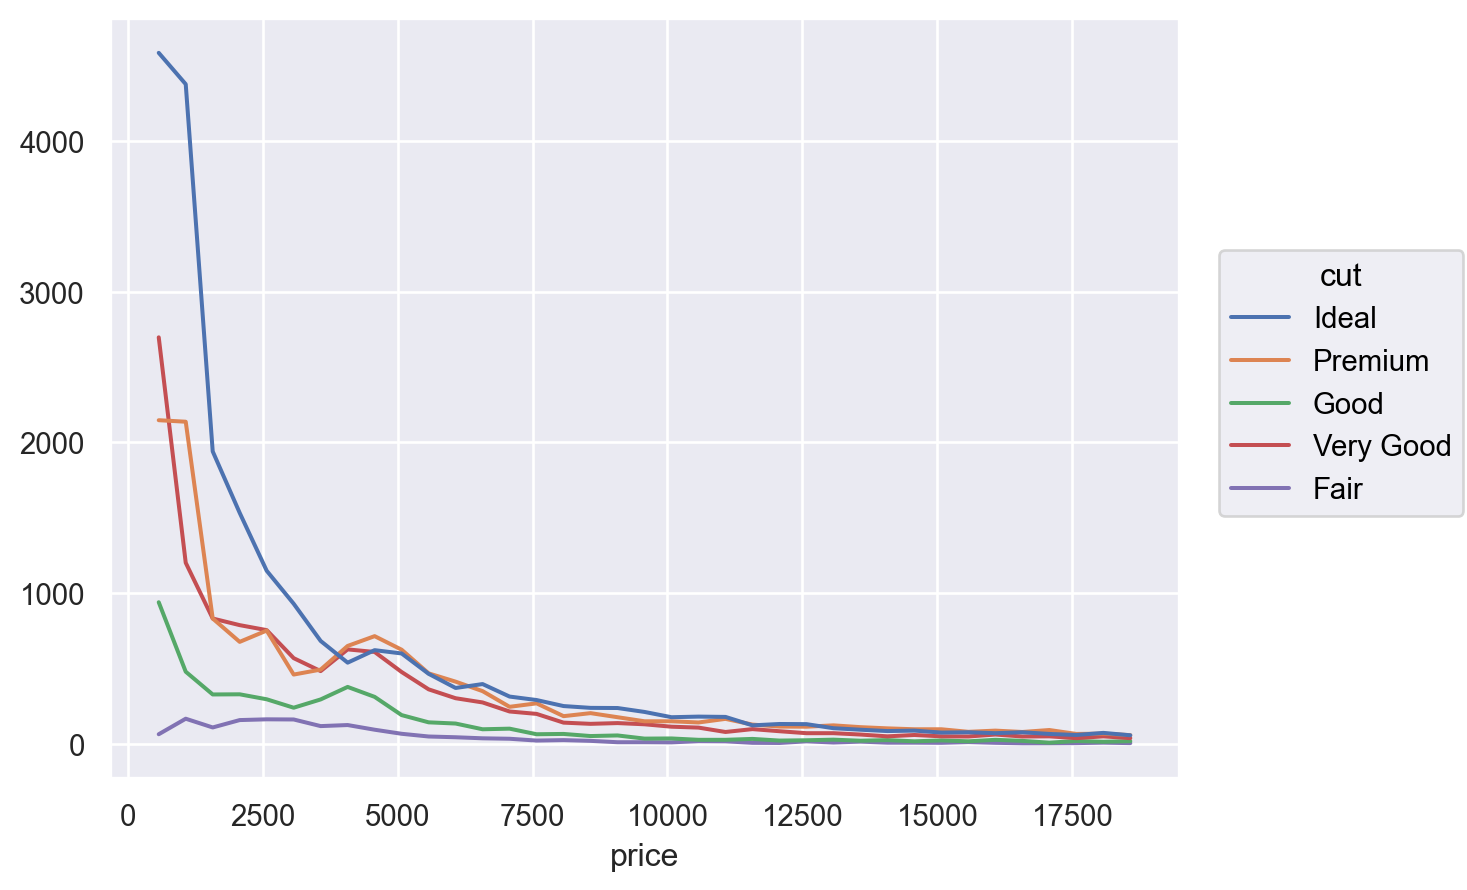

In [20]:
# frequency polygon
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500))
)

# Cut 카테고리에 따라 Price 분포를 보기
# --> 좋은 게 더 많이 팔린다

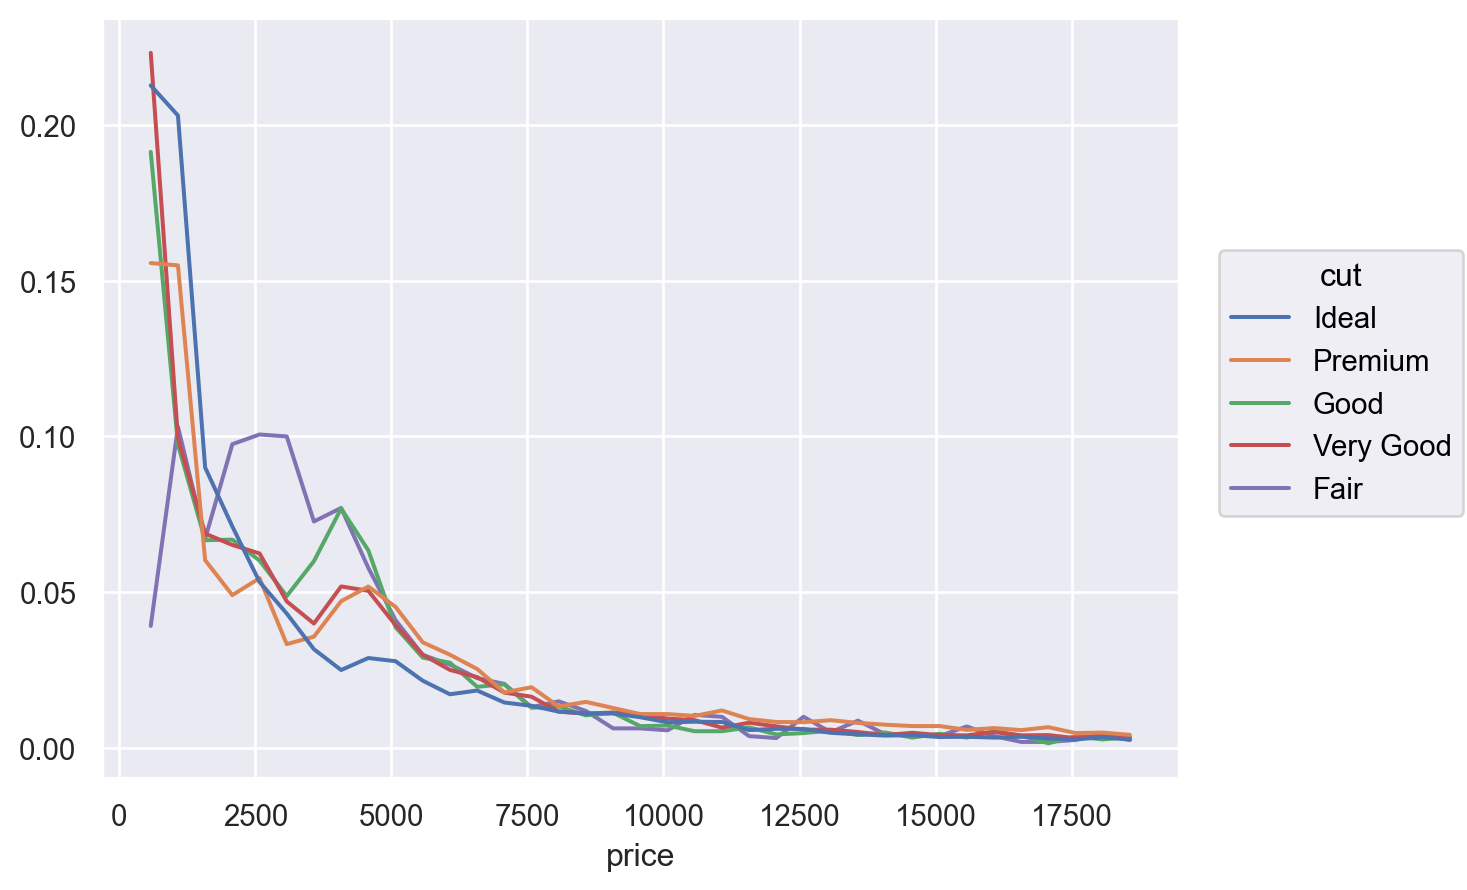

In [21]:
# 각 cut 내에서의 분포가 cut마다 어떻게 다른가 확인
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500, stat="proportion", common_norm=False))
)

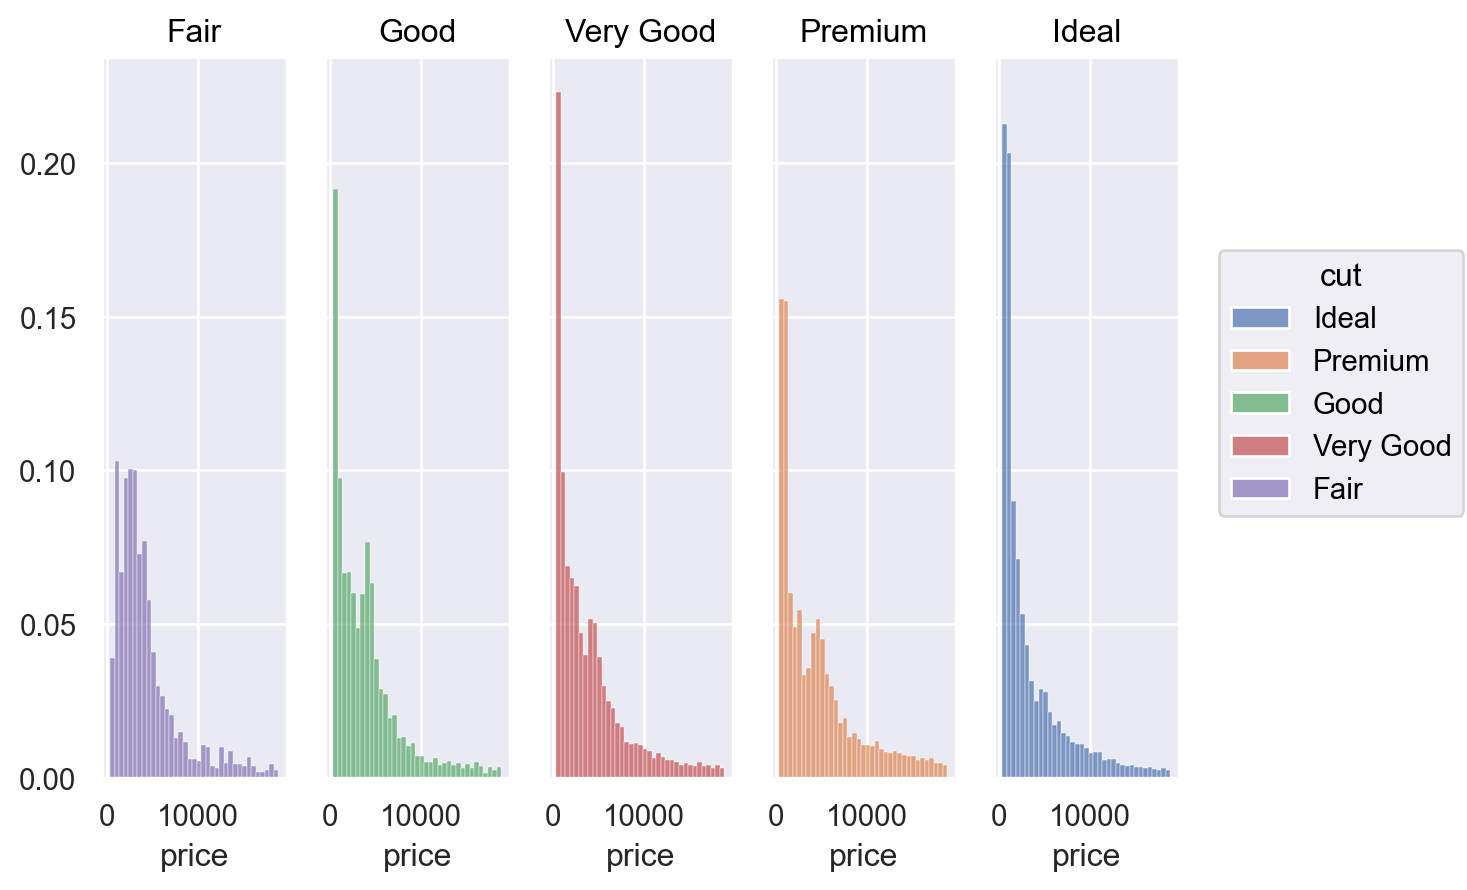

In [22]:
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Bars(), so.Hist(binwidth=500, stat="proportion", common_norm=False))
    .facet("cut")
)

# 분포가 squid 데이터, 한 쪽에 치우쳐진 데이터

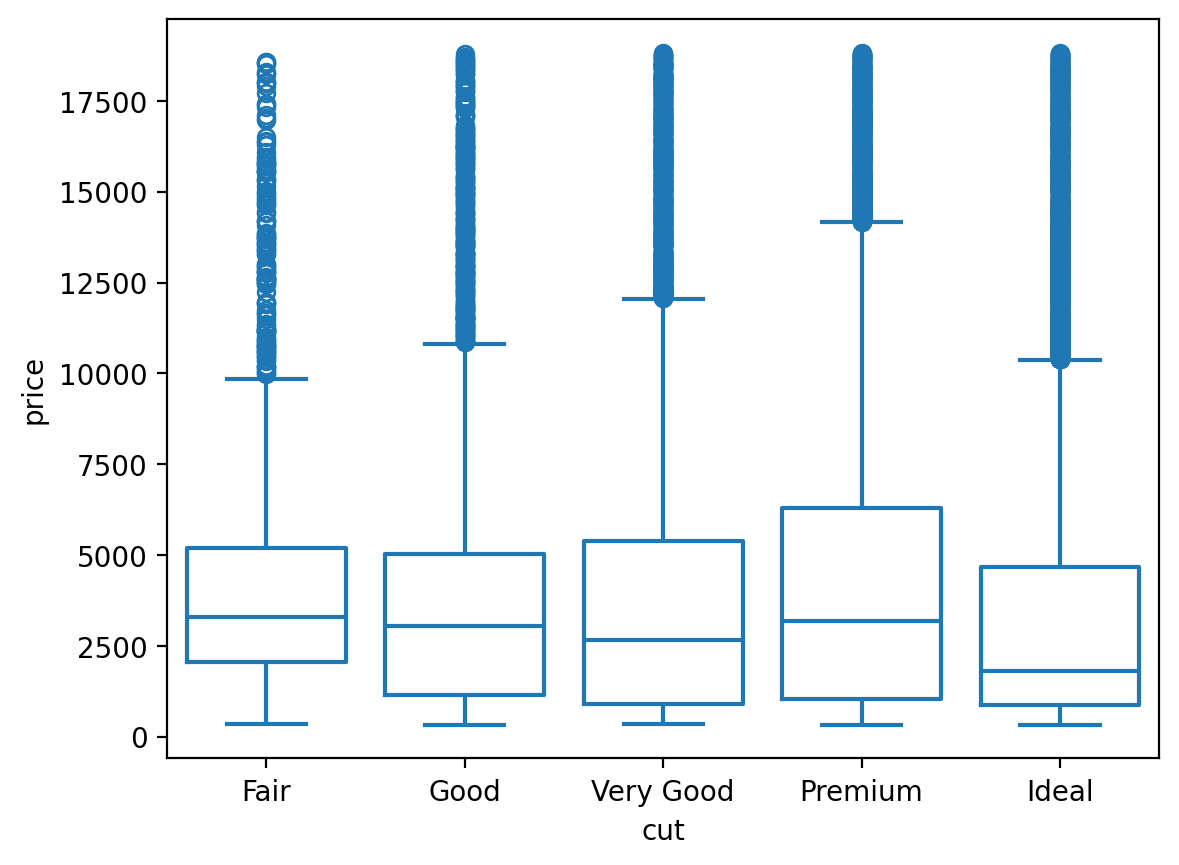

In [23]:
sns.boxplot(diamonds, x="cut", y="price", fill=False)
plt.show()  # 생략

# 왜 fair 컷의 평균 가격이 가장 높은가?
# 다이아몬드 컷의 질이 낮을수록 평균 가격이 높은, 직관적으로 반대되는 패턴을 보임.

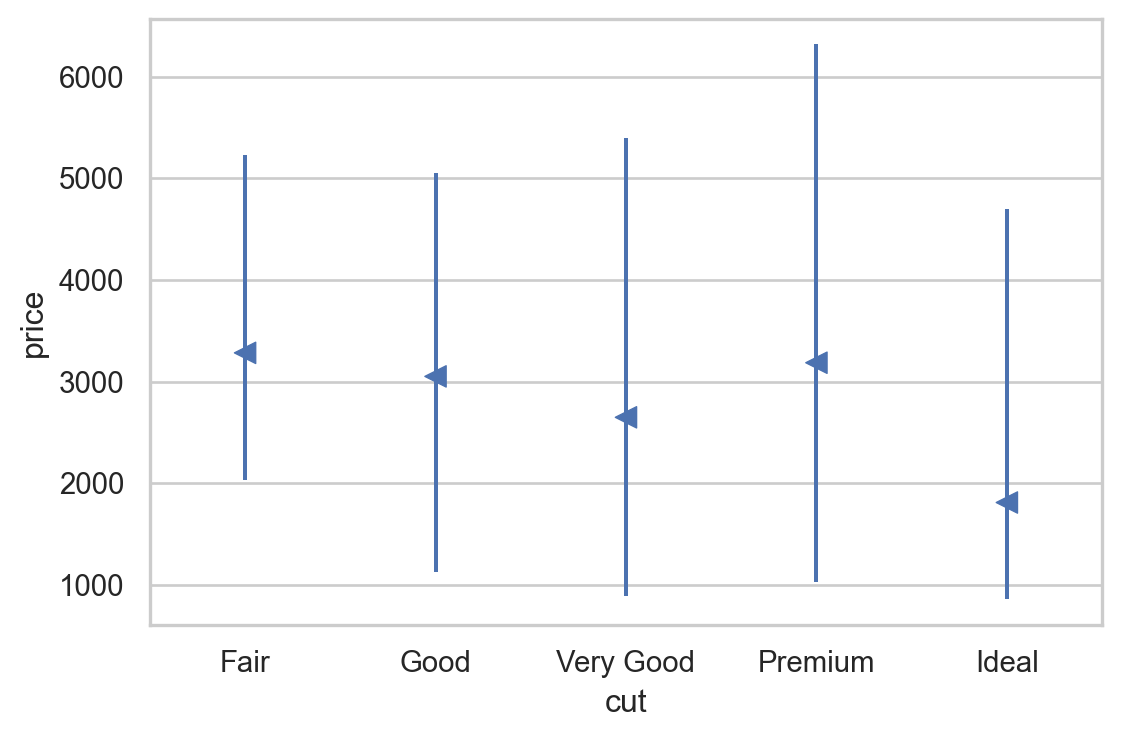

In [24]:
# Custom plots
rangeplot(diamonds, x="cut", y="price").layout(size=(6, 4))
# medium이 거의 쭉 떨어지는 거 확인 가능
# 왜 ideal 제일 쌀까?
# --> 컷(cut)과 가격(price)의 관계는 예상과 달랐는데, 이는 컷(cut)과 무게(carat), 무게(carat)와 가격(price) 사이에 깊은 관계가 있었기 때문임.
# cut을 잘 만들어서 가격이 떨어지는 게 아니라, carat(무게)에 따라 가격이 영향을 크게 받는다. 
# cut이 늘면, carat이 줄고, carat이 줄면 price가 준다.
# cut이 좋아지면 분명히 price가 좋아지는데, carat의 영향력이 매우 크다.

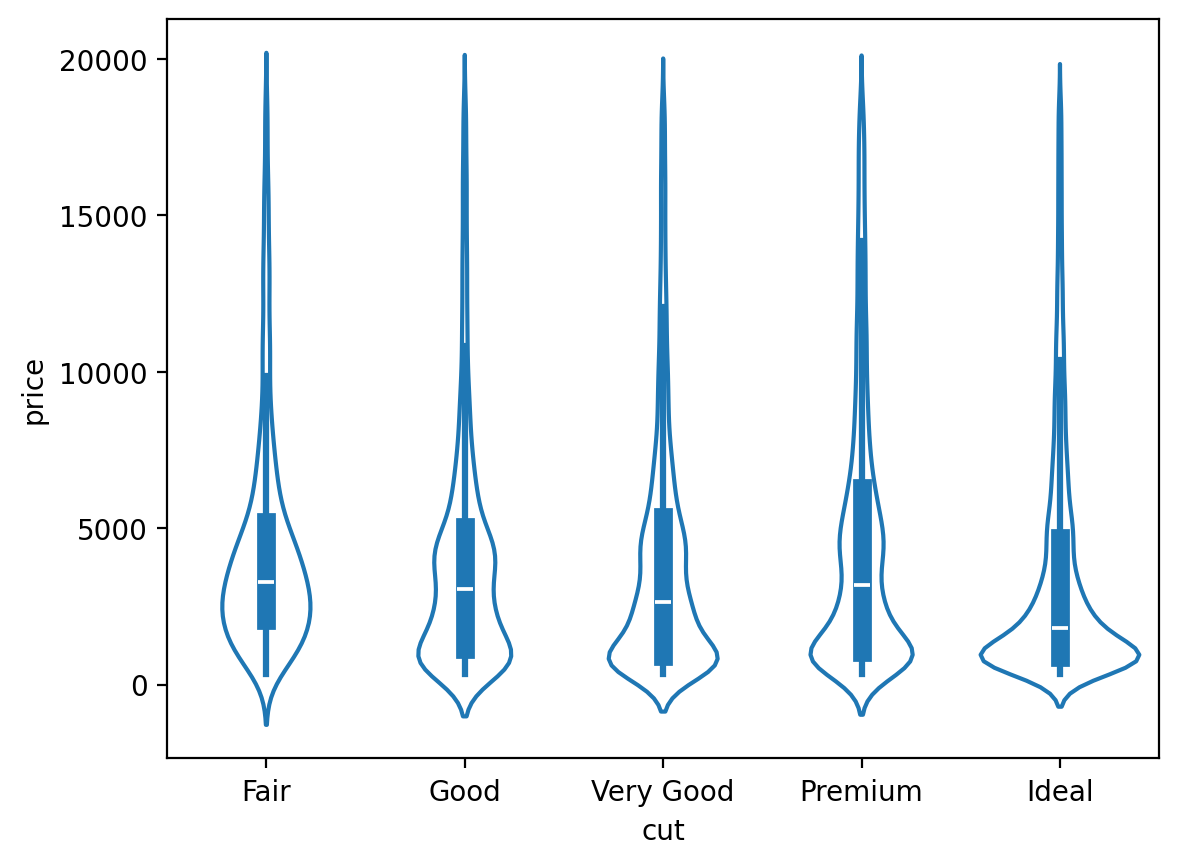

In [25]:
# Violin plot (histogram + boxplot)
sns.violinplot(diamonds, x="cut", y="price", fill=False)
plt.show()  # 생략

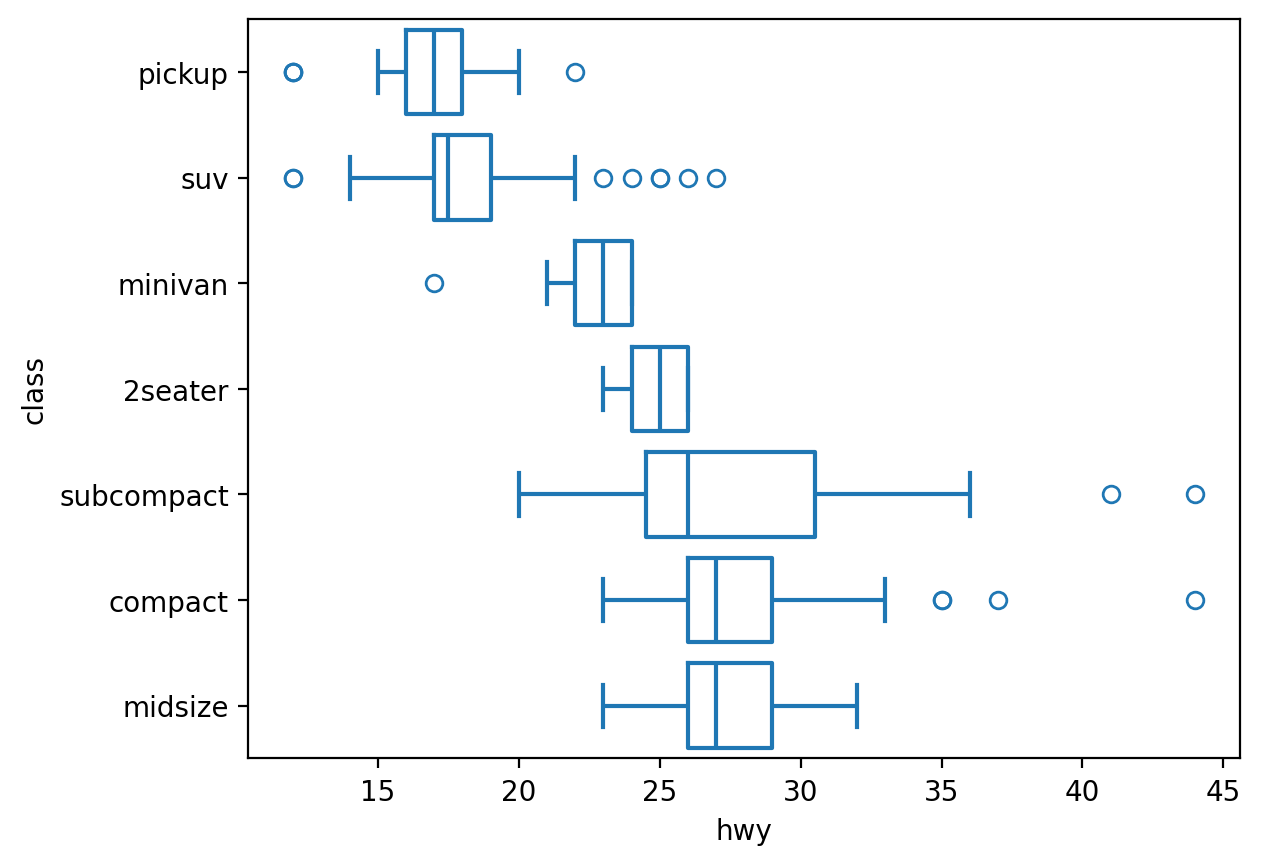

In [26]:
#한편, 카테고리의 순서가 존재하지 않는 경우: 의미있는 순서로 재정렬하여 패턴 파악을 용이하게 할 수 있음
# 예를 들어, 자동차의 class를 고속도로 연비의 중앙값 순으로 정렬하고자 하면,
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data
hwy_order = mpg.groupby("class")["hwy"].median().sort_values().index # order 중요

sns.boxplot(mpg, y="class", x="hwy", fill=False, order=hwy_order)
plt.show()

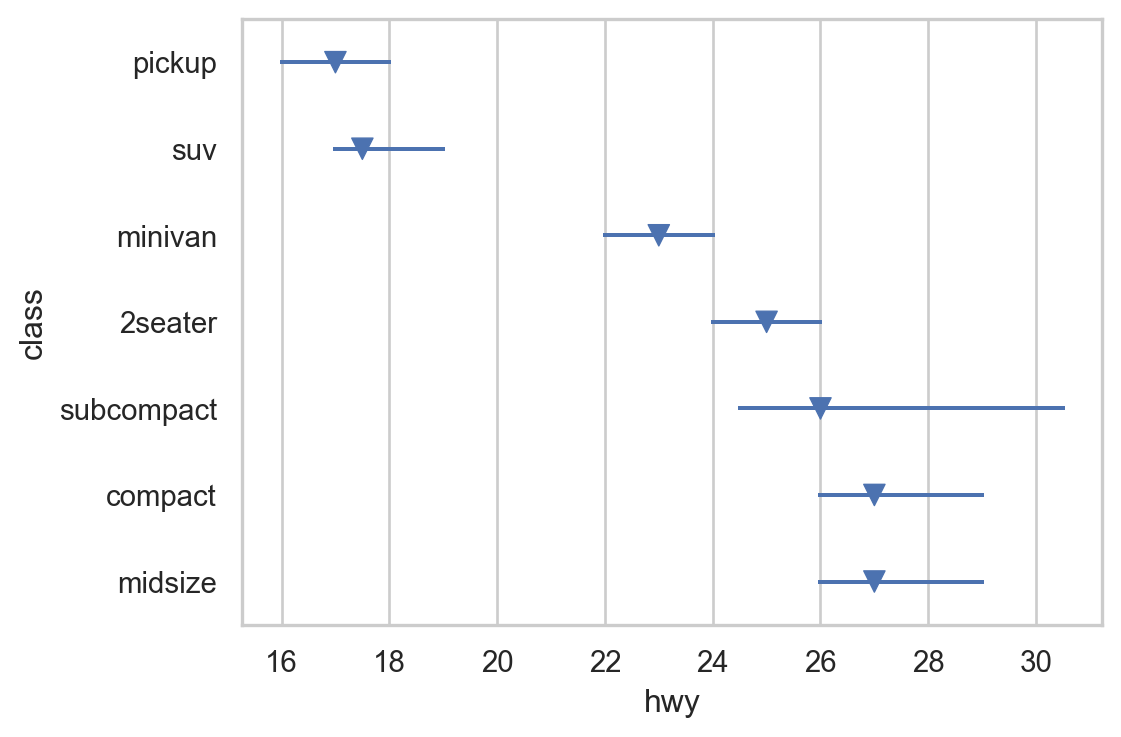

In [27]:
(
    rangeplot(mpg, y="class", x="hwy", marker="v")
    .scale(y=so.Nominal(order=hwy_order))
    .layout(size=(6, 4))
)

# Two categorical variables
## 두 범주형 변수 사이의 covariation을 파악하려면, 두 변수 값의 모든 조합에 대한 count를 표시

In [28]:
table_cut = diamonds.groupby(["cut", "clarity"]).size().reset_index(name="n")
table_cut

# cut과 clarity가 관계가 있는지 확인하려면, cut을 알면 clarity 유추가 되는지
# clarity를 알면 cut이 유추가 되는지? 뭐 이런 걸로 예측해봐라.
# 좋은 cut이면 clarity도 좋을까?

C:\Users\ygeun\AppData\Local\Temp\ipykernel_10148\2810451679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table_cut = diamonds.groupby(["cut", "clarity"]).size().reset_index(name="n")


,cut,clarity,n
0,Fair,I1,210
1,Fair,SI2,466
2,Fair,SI1,408
3,Fair,VS2,261
4,Fair,VS1,170
5,Fair,VVS2,69
6,Fair,VVS1,17
7,Fair,IF,9
8,Good,I1,96
...,...,...,...


In [29]:
p1 = (
    so.Plot(table_cut, x="cut", y="clarity", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
)
p2 = (
    so.Plot(diamonds, x='cut', y='clarity')
    .add(so.Line(), so.PolyFit(3))
)
# 시각화를 통해서 아주 뚜렷하게 알 순 없다 (clear하지 않다.)

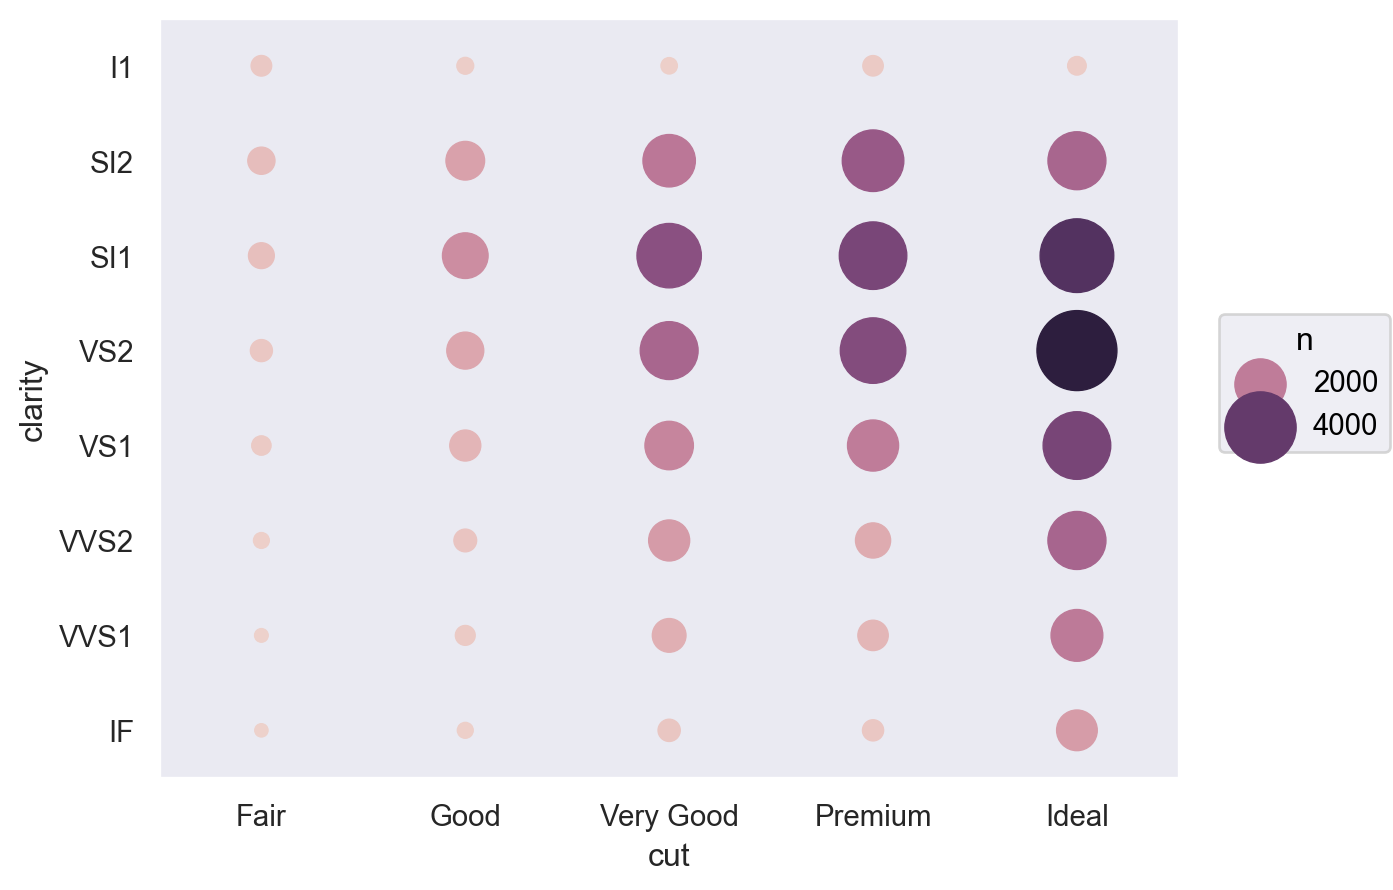

In [30]:
p1

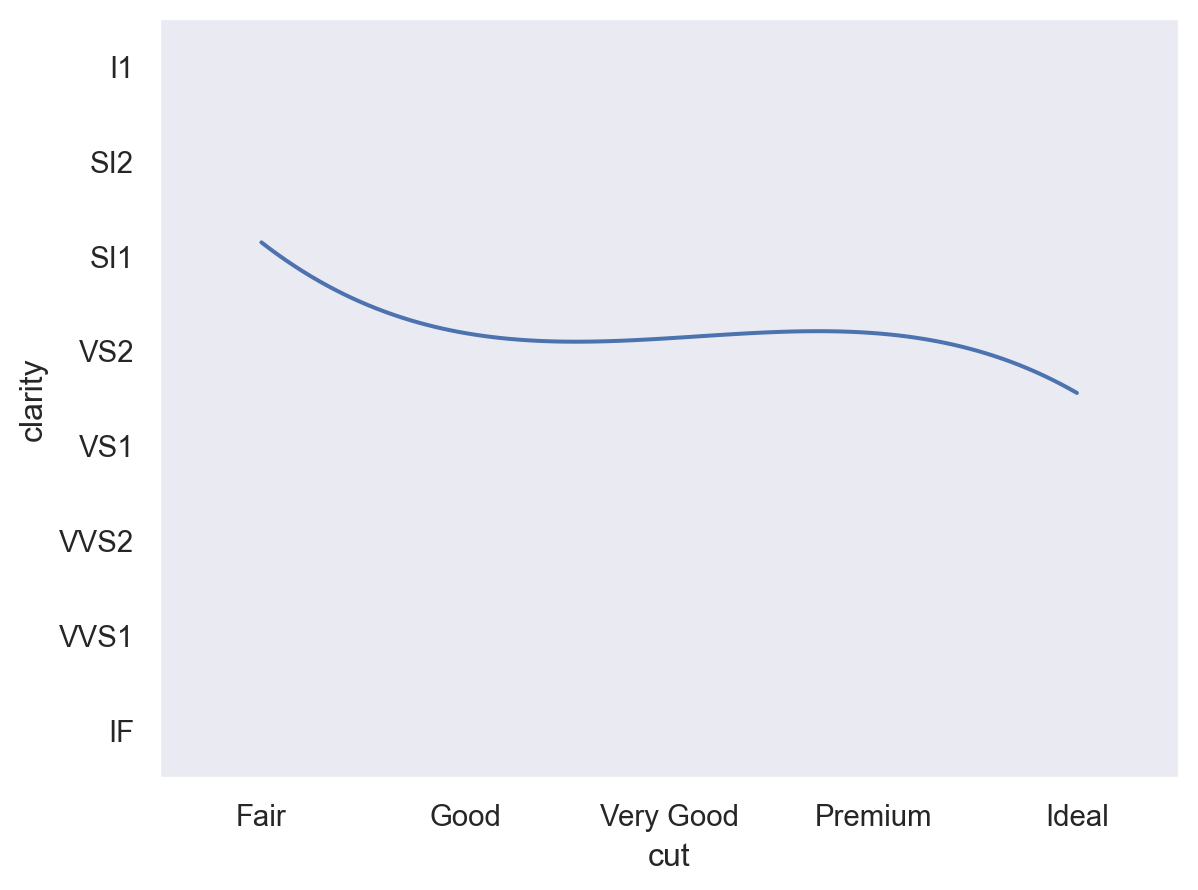

In [31]:
p2

In [32]:
gapminder = sm.datasets.get_rdataset("gapminder", "gapminder").data
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10
3,Afghanistan,Asia,1967,34.02,11537966,836.20
4,Afghanistan,Asia,1972,36.09,13079460,739.98
5,Afghanistan,Asia,1977,38.44,14880372,786.11
6,Afghanistan,Asia,1982,39.85,12881816,978.01
7,Afghanistan,Asia,1987,40.82,13867957,852.40
8,Afghanistan,Asia,1992,41.67,16317921,649.34
...,...,...,...,...,...,...


In [33]:
plotdata = (
    gapminder
    .query('continent == "Asia"')
    .pivot(index="country", columns="year", values="lifeExp")  # wide format 변환
)
plotdata

# 평균 수명

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.80,30.33,32.00,34.02,36.09,38.44,39.85,40.82,41.67,41.76,42.13,43.83
Bahrain,50.94,53.83,56.92,59.92,63.30,65.59,69.05,70.75,72.60,73.92,74.80,75.64
Bangladesh,37.48,39.35,41.22,43.45,45.25,46.92,50.01,52.82,56.02,59.41,62.01,64.06
Cambodia,39.42,41.37,43.41,45.41,40.32,31.22,50.96,53.91,55.80,56.53,56.75,59.72
China,44.00,50.55,44.50,58.38,63.12,63.97,65.53,67.27,68.69,70.43,72.03,72.96
"Hong Kong, China",60.96,64.75,67.65,70.00,72.00,73.60,75.45,76.20,77.60,80.00,81.50,82.21
India,37.37,40.25,43.60,47.19,50.65,54.21,56.60,58.55,60.22,61.77,62.88,64.70
Indonesia,37.47,39.92,42.52,45.96,49.20,52.70,56.16,60.14,62.68,66.04,68.59,70.65
Iran,44.87,47.18,49.33,52.47,55.23,57.70,59.62,63.04,65.74,68.04,69.45,70.96


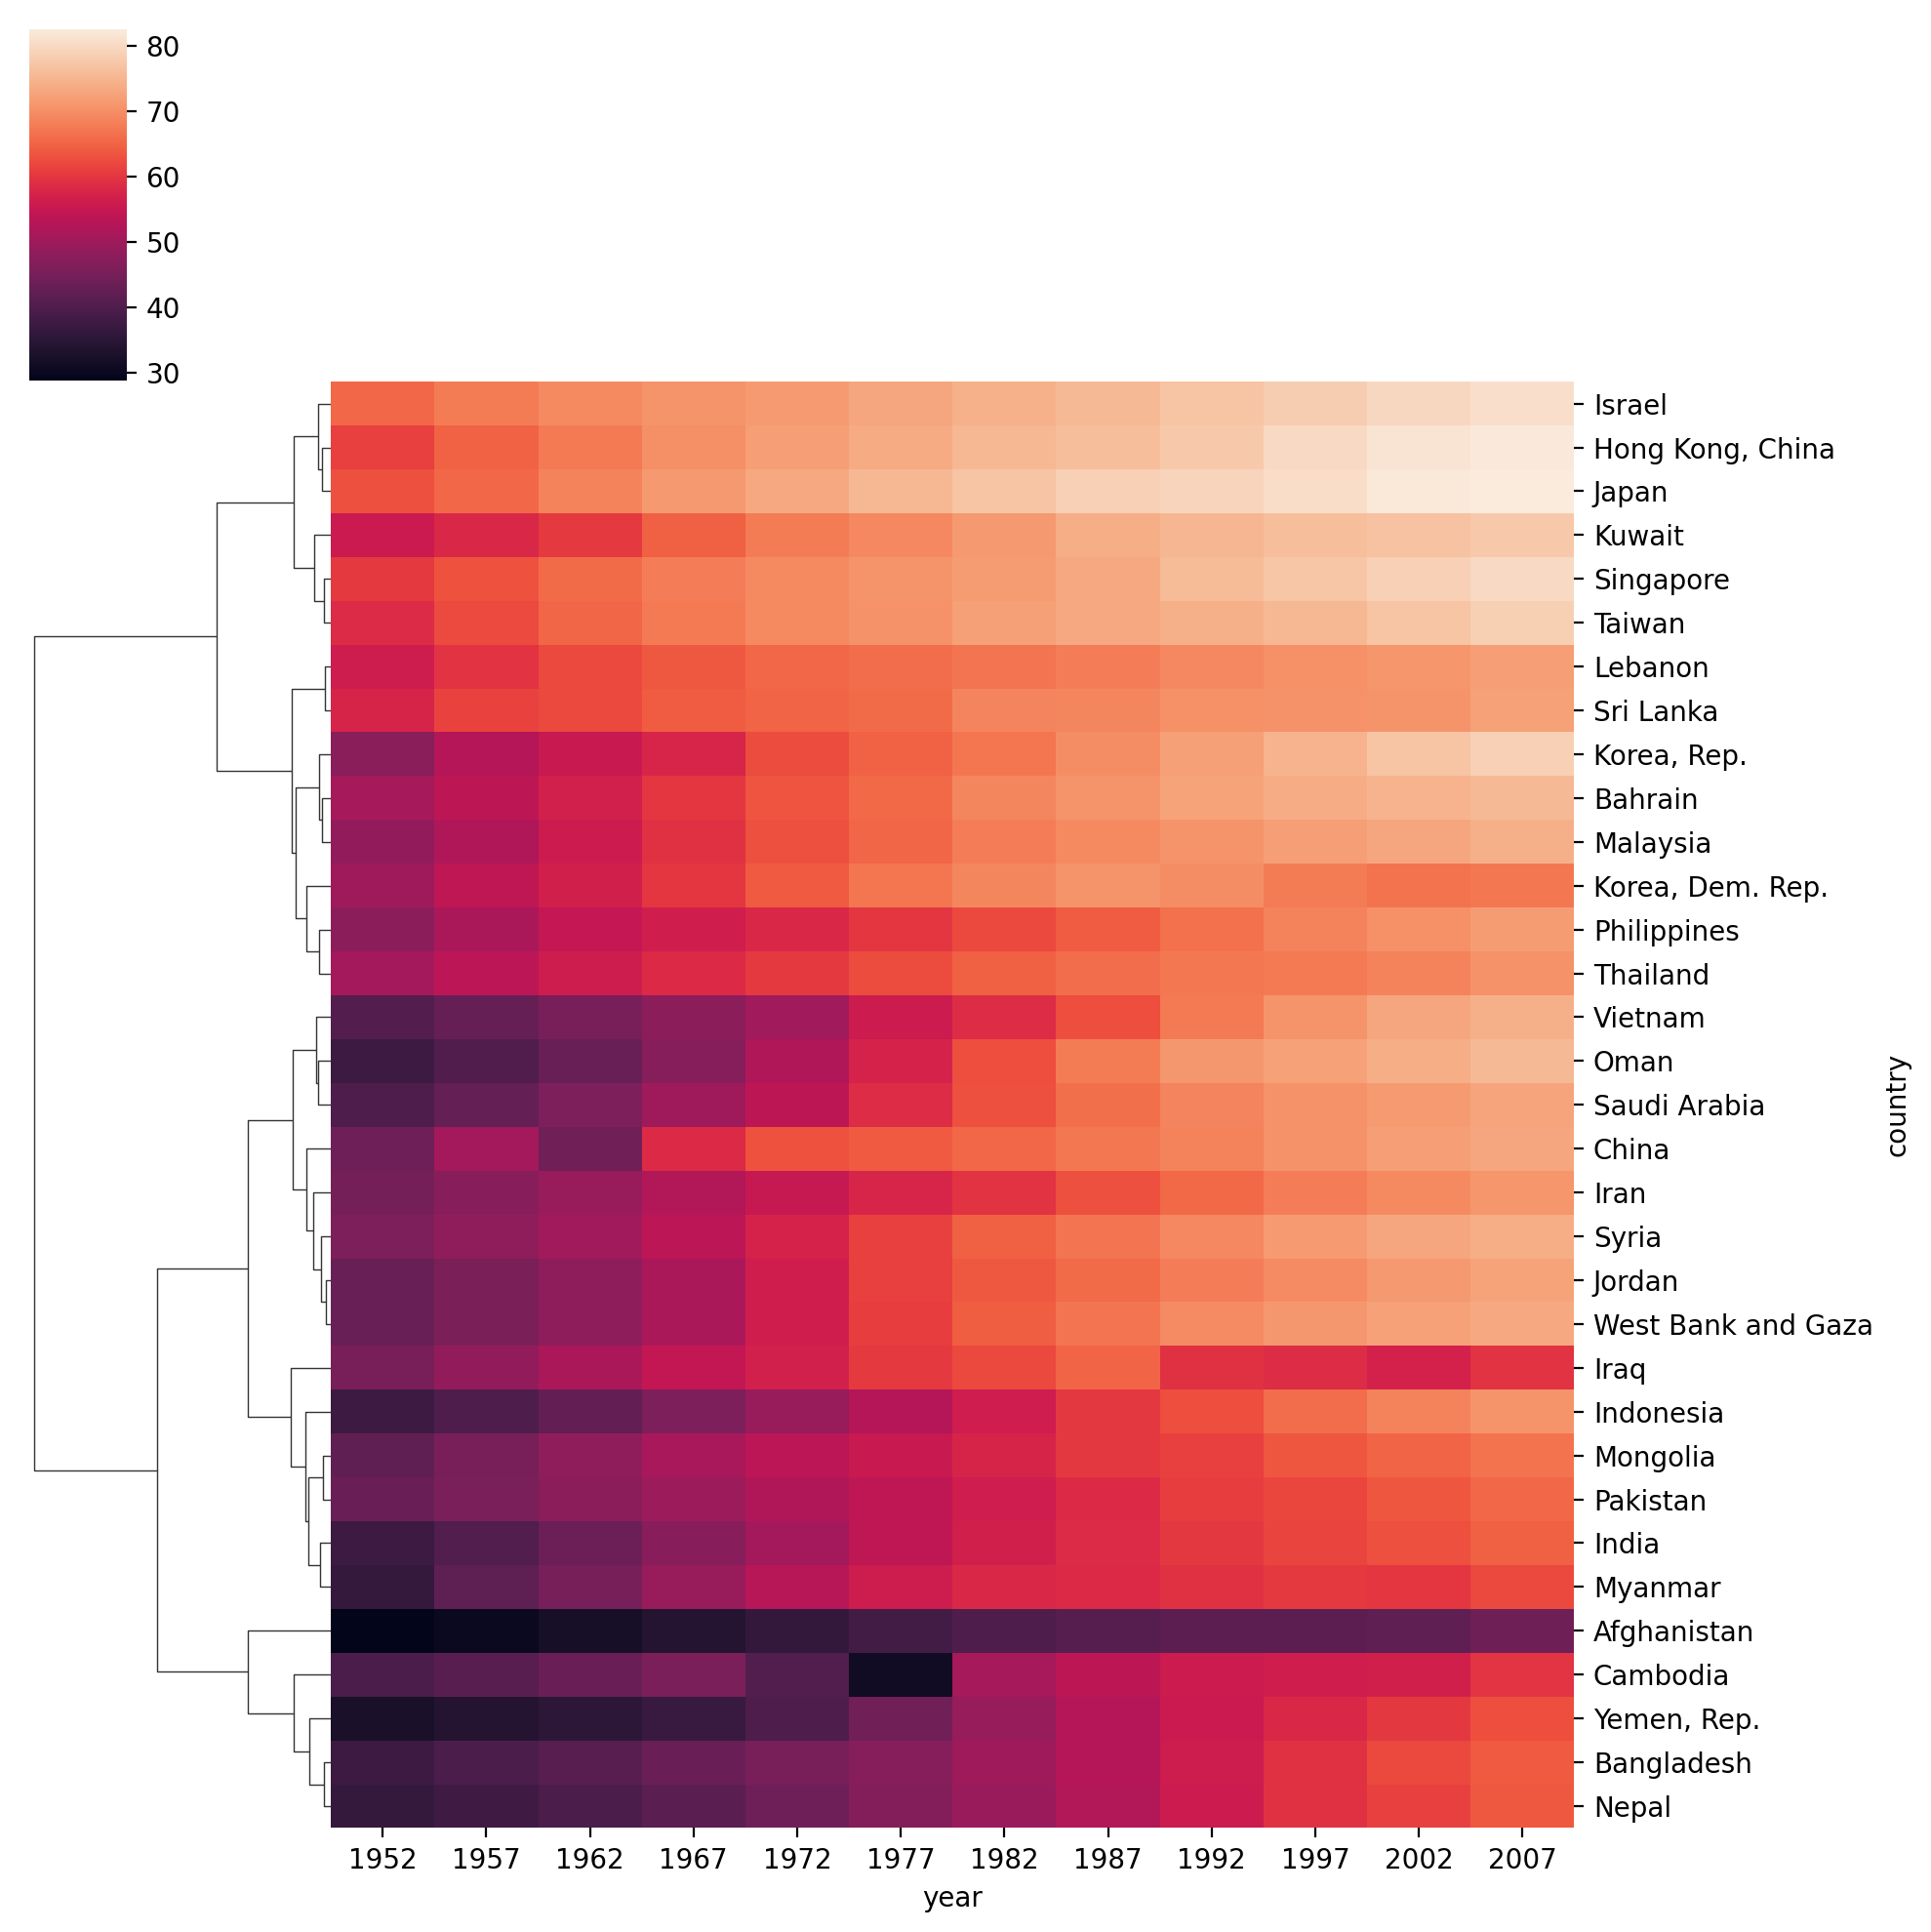

In [34]:
# hierarchical clustering in scipy
sns.clustermap(plotdata, col_cluster=False, method="ward")
plt.show()  # 생략

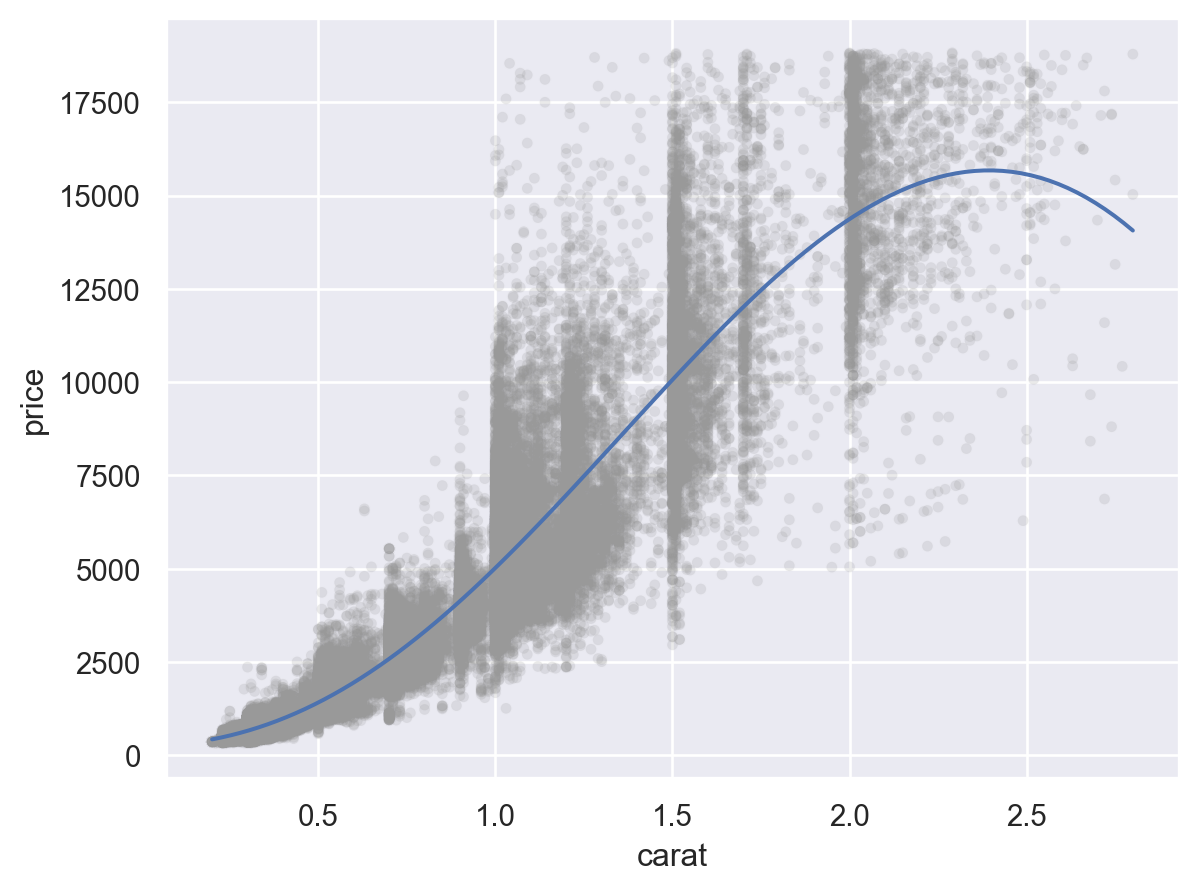

In [35]:
(
    so.Plot(diamonds.query('carat < 3'), x="carat", y="price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5)) # 5창 다항함수 trend line 그림
)

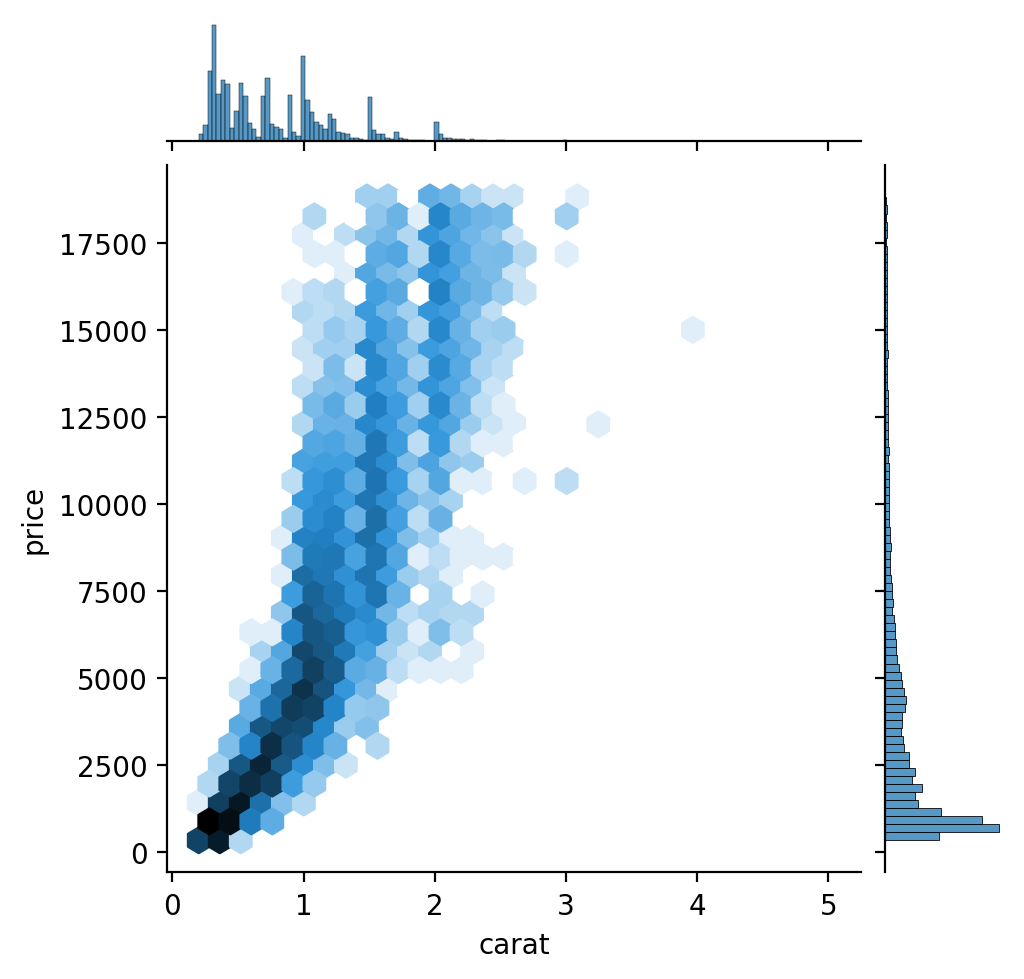

In [36]:
# 2d-histogram
from matplotlib.colors import LogNorm

sns.jointplot(diamonds, x="carat", y="price", kind="hex", gridsize=30, height=5, norm=LogNorm())  # gridsize: bin 개수
plt.show()

# 진할수록 데이터가 많음

In [37]:
diamonds_cat = diamonds.query("carat < 3").assign(
    carat_cat=lambda x: pd.cut(x.carat, 20, labels=False),
    carat_qcat=lambda x: pd.qcut(x.carat, 20, labels=False),
)
# 캐럿 구간 쪼개서 카테고리로 만든다.

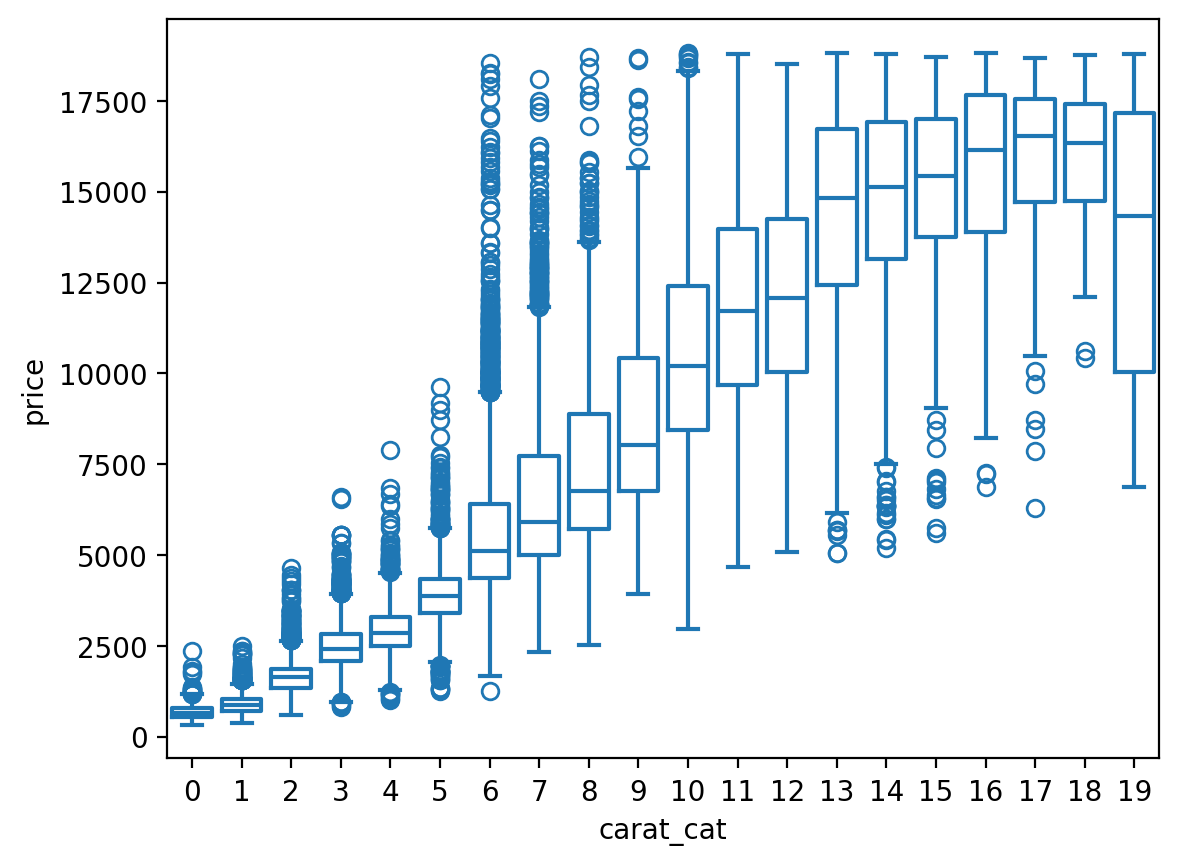

In [38]:
sns.boxplot(diamonds_cat, x="carat_cat", y="price", fill=False)
plt.show() # 생략

In [39]:
diamonds_cat = diamonds.query("carat < 3").assign( # assign 함수로
    carat_cat=lambda x: pd.cut(x.carat, 20, labels=False), # cut으로 carat 값을 구간으로 쪼개서 category로 만들어준다.
    carat_qcat=lambda x: pd.qcut(x.carat, 20, labels=False), # qcut: 구간에 있는 데이터 개수를 거의 일정하게 가지게
)

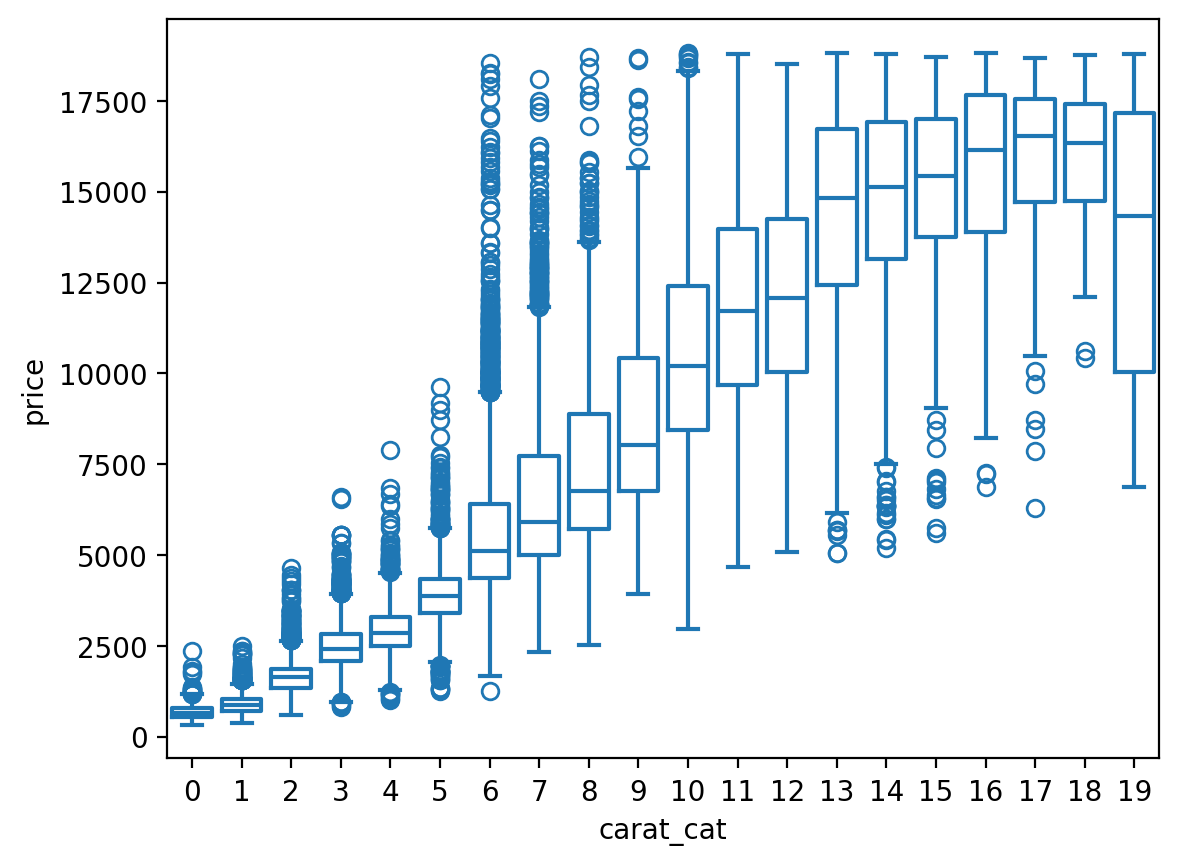

In [40]:
sns.boxplot(diamonds_cat, x="carat_cat", y="price", fill=False)
plt.show() # 생략

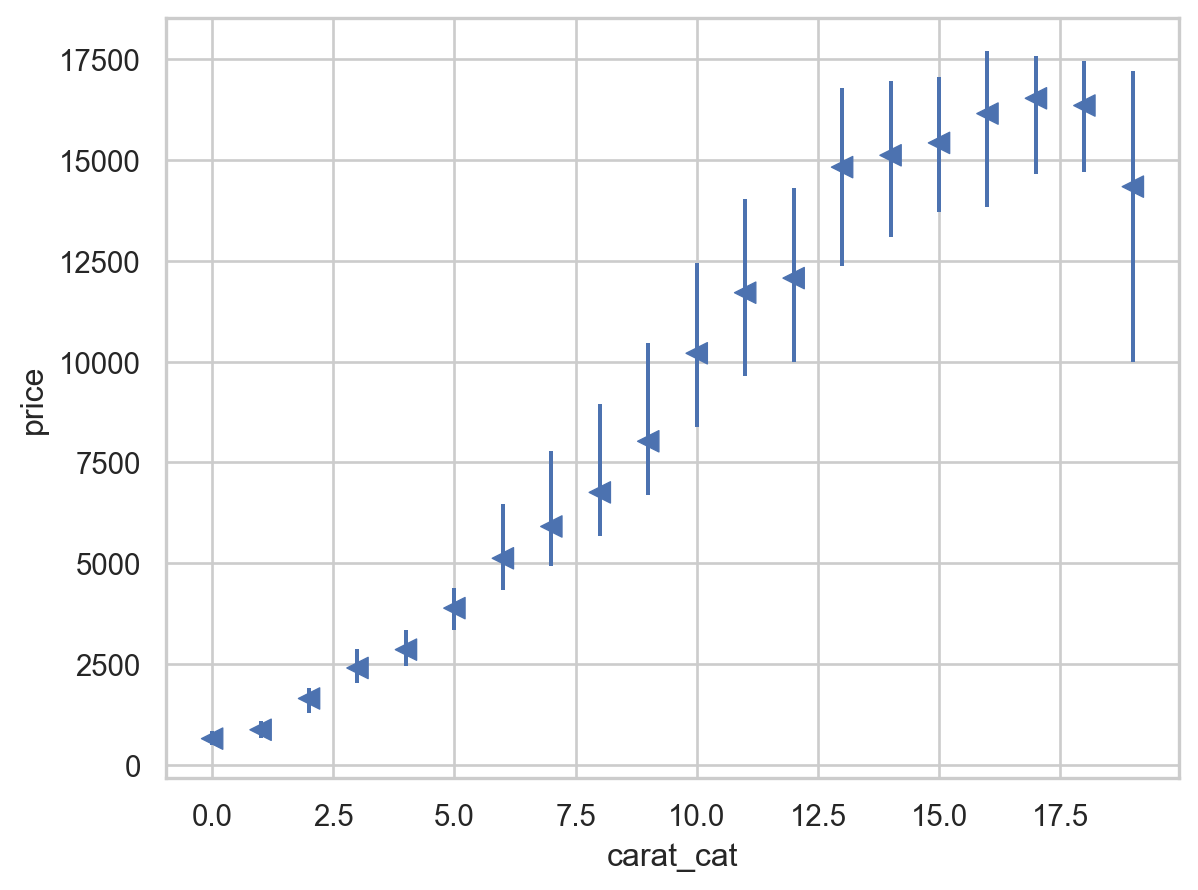

In [41]:
rangeplot(diamonds_cat, x="carat_cat", y="price")

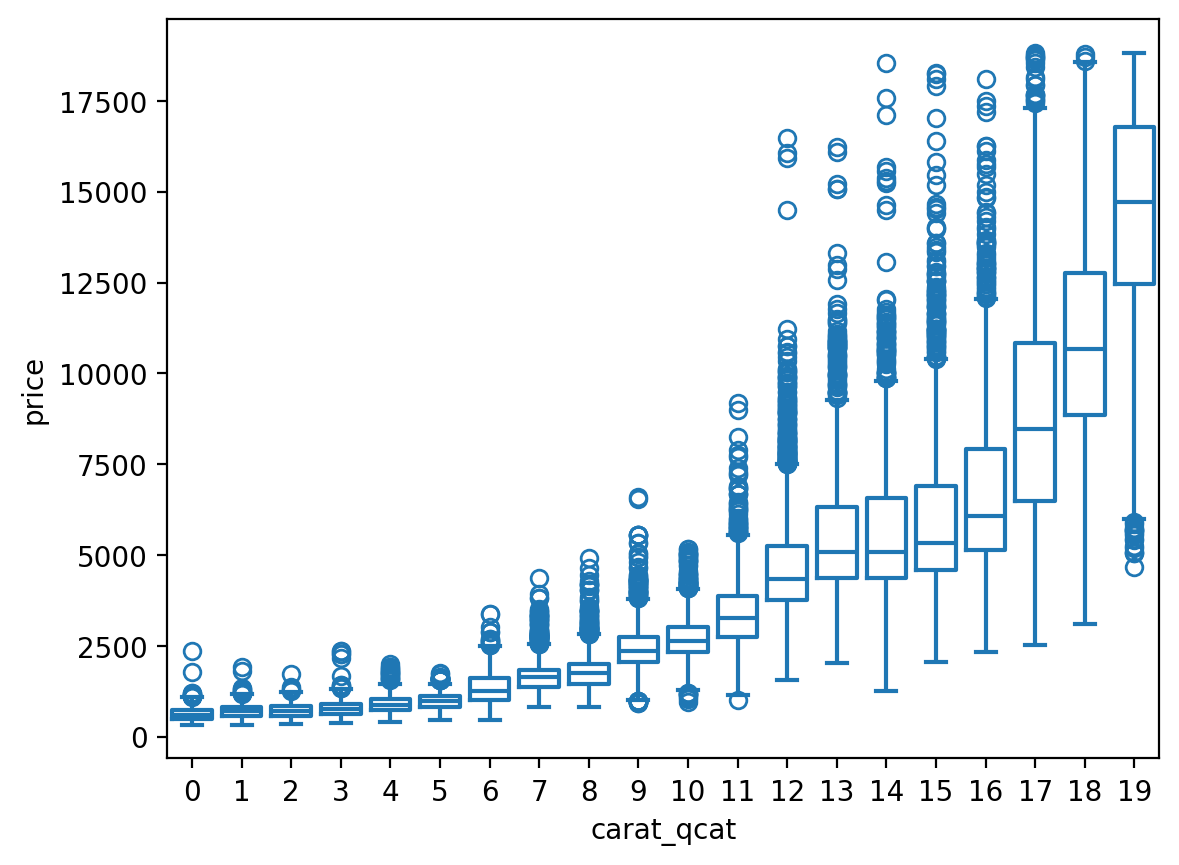

In [42]:
sns.boxplot(diamonds_cat, x="carat_qcat", y="price", fill=False)
plt.show()  # 생략